# Data Preprocessing Project – Feature Scaling


In this project, I discuss various data preprocessing techniques related to feature scaling.


The contents of this project are divided as follows:-



## Table of Contents


1.	Introduction

2.	Rescaling data with MinMaxScaler

3.	Standardising data with StandardScaler

4.  Rescaling data with MaxAbsScaler

5.  Rescaling data with RobustScaler

6.	Normalizing data with Normalizer

7.	Binarizing data with Binarizer

8.	Mean removal with scale




## 1. Introduction


One of the most important data preprocessing step, we need to apply to our data is feature scaling. When we encounter any real world data set, the independent or feature variables may be mapped onto different scales.  **Feature scaling** refers to procedures used to standardize these independent or feature variables so that they are mapped onto same scales.


Most of the ML algorithms perform well when the feature variables are mapped onto the same scale. They don’t perform well when features are mapped onto different scales. For example, in stochastic gradient descent, feature scaling can improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors. 


But, there are few exceptions as well. Decision trees and random forests are two of the algorithms where we don’t need to worry about feature scaling. These algorithms are scale invariant. Similarly, Naive Bayes and Linear Discriminant Analysis are not affected by feature scaling. In Short, any Algorithm which is not distance based is not affected by feature scaling.

So, let’s start our discussion of various techniques associated with feature scaling.


In [1]:
# Import the dependencies

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

In [2]:
# ignore the warnings

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

## 2. Rescaling data with MinMaxScaler


This technique of rescaling is also called **min-max scaling** or **min-max normalization**. **Normalization** refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. So, in this technique, values are shifted and rescaled so that they end up ranging from zero to one. We do this by subtracting the minimum value (xmin ) and dividing by the maximum value (xmax ) minus the minimum value (xmin ). 


Mathematically, the new value x(i)norm of a sample x(i) can be calculated as follows:-

 
		     x(i)norm  =  (xi-  xmin )/(xmax-  xmin )
             
	
Here, x(i) is a particular sample value. xmax and xmin is the maximum and minimum feature value in a column.

	
Scikit-Learn provides a transformer called **MinMaxScaler** for this task. It has a feature range parameter to adjust the range of values. This estimator fit and transform each feature variable individually such that it is in the given range (between zero and one) on the training set. 

**MinMaxScaler** works well for the cases when the distribution is not normal or when the standard deviation is very small. But, it has one drawback. It is sensitive to outliers


The syntax for implementing min-max scaling procedure in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import MinMaxScaler`

`ms = MinMaxScaler()`

`X_train_ms = ms.fit_transform(X_train)`

`X_test_ms = ms.transform(X_test)`


In [3]:
# Create sample dataset to demonstrate minmaxscaling


df1 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [4]:
# Use MinMaxScaler to apply minmaxscaling

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_df1 = ms.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['x1', 'x2', 'x3'])

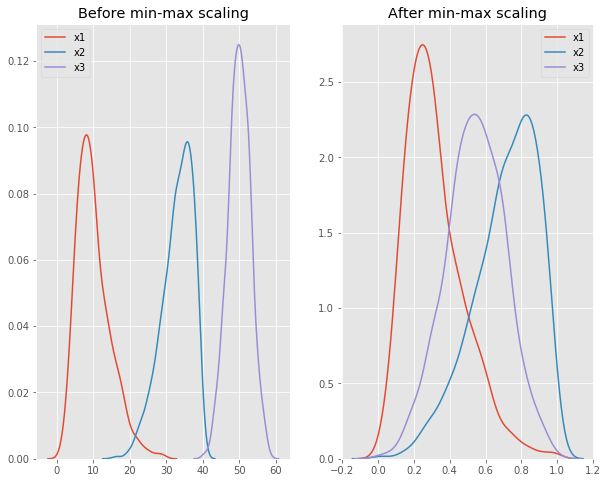

In [5]:
# Plot and visualize the results


fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before min-max scaling')
sns.kdeplot(df1['x1'], ax=ax1)
sns.kdeplot(df1['x2'], ax=ax1)
sns.kdeplot(df1['x3'], ax=ax1)

ax2.set_title('After min-max scaling')
sns.kdeplot(scaled_df1['x1'], ax=ax2)
sns.kdeplot(scaled_df1['x2'], ax=ax2)
sns.kdeplot(scaled_df1['x3'], ax=ax2)

plt.show()

**Interpretation**

We can see that the skewness of the distributions are maintained. But, now the three distributions are brought onto the same scale such that they overlap.

As with all the other transformers, we fit this transformer to the training data only, not to the full data set (including the test set). Only then we can use them to transform the training set and the test set and new data.

## 3. Standardising data with StandardScaler


There is another practical approach for feature scaling which might be more useful in certain circumstances. It is called **standardization**. It can be more useful for many machine learning algorithms, especially for optimization algorithms such as gradient descent.


In **standardization**, first we determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation. So, in standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights.


Scikit-Learn provides a transformer called **StandardScaler** for standardization. The **StandardScaler** transformer assumes that the data is normally distributed within each feature and it will scale them such that the distribution is centered around 0 and and have a standard deviation of 1.


Mathematically, **standardization** can be expressed by the following equation: 


		x(i)std =  ( x(i)- μx)/(σx )


Here, x(i) is a particular sample value and x(i)std is its standard deviation , μx is the sample mean of a particular feature column and σx is the corresponding standard deviation.


Min-max scaling scales the data to a limited range of values. Unlike min-max scaling, standardization does not bound values to a specific range. So, standardization is much less affected by outliers. Standardization maintains useful information about outliers and is much less affected by them. It makes the algorithm less sensitive to outliers in contrast to min-max scaling. 


The syntax to implement standardization is quite similar to min-max scaling given as follows :-


`from sklearn.preprocessing import StandardScaler`

`ss = StandardScaler()`

`X_train_ss = ss.fit_transform(X_train)`

`X_test_ss = ss.transform(X_test)`


In [6]:
# Create sample dataset to demonstrate standardization

np.random.seed(1)
df2 = pd.DataFrame({
            'x1':np.random.normal(0, 10, 10000),
            'x2':np.random.normal(10, 20, 10000),
            'x3':np.random.normal(-10, 10, 10000)
})

In [7]:
# Use StandardScaler to apply Standardisation

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df2 = ss.fit_transform(df2)
scaled_df2 = pd.DataFrame(scaled_df2, columns = ['x1', 'x2', 'x3'])

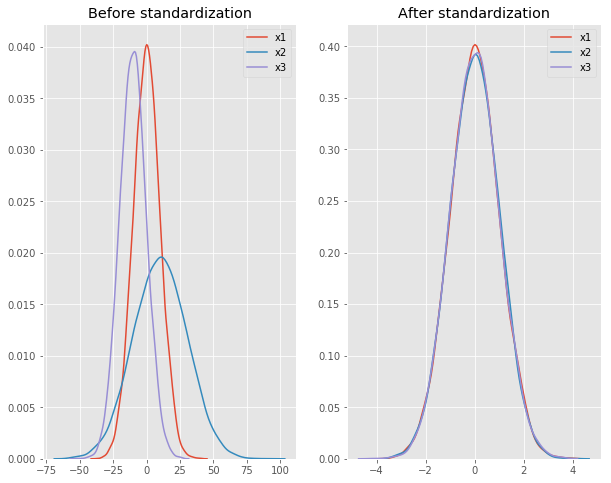

In [8]:
# Plot and visualize the results


fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(df2['x1'], ax=ax1)
sns.kdeplot(df2['x2'], ax=ax1)
sns.kdeplot(df2['x3'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaled_df2['x1'], ax=ax2)
sns.kdeplot(scaled_df2['x2'], ax=ax2)
sns.kdeplot(scaled_df2['x3'], ax=ax2)

plt.show()


**Interpretation**

As we can see, all the features are now on the same scale relative to one another. 

We should fit the **StandardScaler** class only once on the training data set and use those parameters to transform the test set or new data set. 

So, we can **standardize** the training dataset and use the same mean and standard deviation to **standardize** the test dataset.


## 4. Rescaling data with MaxAbsScaler



In this feature rescaling task, we rescale each feature by its maximum absolute value. So, the maximum absolute value of each feature in the training set will be 1.0. It does not affect the data and hence there is no effect on sparsity.

Scikit-Learn provides **MaxAbsScaler** transformer for this task.

The syntax for implementing max-abs scaling procedure in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import MaxAbsScaler`

`mabs = MaxAbsScaler()`

`X_train_mabs = mabs.fit_transform(X_train)`

`X_test_mabs = mabs.transform(X_test)`


In [9]:
# Create sample dataset to demonstrate maxabsscaling


df3 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [10]:
# Use MaxAbsScaler to apply maxabsscaling

from sklearn.preprocessing import MaxAbsScaler
mabs = MaxAbsScaler()
scaled_df3 = mabs.fit_transform(df3)
scaled_df3 = pd.DataFrame(scaled_df3, columns=['x1', 'x2', 'x3'])

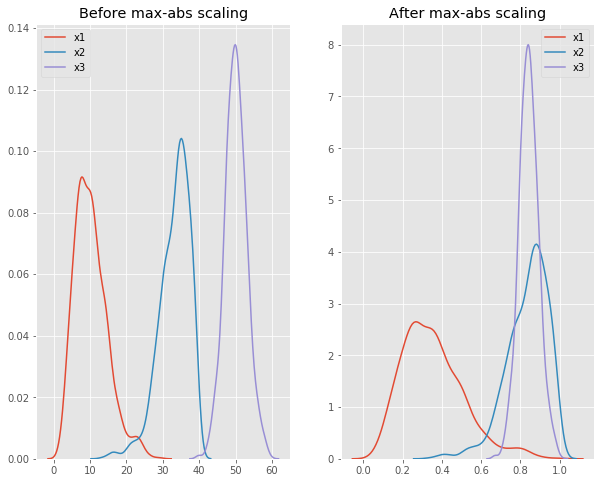

In [11]:
# Plot and visualize the results


fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before max-abs scaling')
sns.kdeplot(df3['x1'], ax=ax1)
sns.kdeplot(df3['x2'], ax=ax1)
sns.kdeplot(df3['x3'], ax=ax1)

ax2.set_title('After max-abs scaling')
sns.kdeplot(scaled_df3['x1'], ax=ax2)
sns.kdeplot(scaled_df3['x2'], ax=ax2)
sns.kdeplot(scaled_df3['x3'], ax=ax2)

plt.show()

**Interpretation**

**MaxAbsScaler** results in the feature variables being rescaled by their maximum absolute value.

## 5. Rescaling using RobustScaler



**StandardScaler** can often give misleading results when the data contain outliers.  Outliers can often influence the sample mean and variance and hence give misleading results. In such cases, it is better to use a scalar that is robust against outliers. Scikit-Learn provides a transformer called **RobustScaler** for this purpose.


The **RobustScaler** is very similar to **MinMaxScaler**. The difference lies in the parameters used for scaling. 
While **MinMaxScaler** uses minimum and maximum values for rescaling, **RobustScaler** uses interquartile(IQR) range 
for the same.



Mathematically, the new value x(i)norm of a sample x(i) can be calculated as follows:-

 
		     x(i)  =  (xi-  Q1(x) )/(Q3(x) - Q1(x))
             
	
Here, x(i) is the scaled value, xi is a particular sample value, Q1(x) and Q3(x) are the 1st quartile (25th quantile) and 
3rd quartile (75th quantile) respectively. So, Q3(x) - Q1(x) is the difference between 3rd quartile (75th quantile) and 
1st quartile (25th quantile) respectively. It is called IQR (Interquartile Range).

	

The syntax for implementing scaling using RobustScaler in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import RobustScaler`

`rb = RobustScaler()`

`X_train_rb = rb.fit_transform(X_train)`

`X_test_rb = rb.transform(X_test)`


In [12]:
# Create sample dataset to demonstrate scaling using RobustScaler

df4 = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [13]:
# Use RobustScaler for scaling

from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
robust_scaled_df4 = rb.fit_transform(df4)
robust_scaled_df4 = pd.DataFrame(robust_scaled_df4, columns=['x1', 'x2'])

# Use MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
minmax_scaled_df4 = ms.fit_transform(df4)
minmax_scaled_df4 = pd.DataFrame(minmax_scaled_df4, columns=['x1', 'x2'])

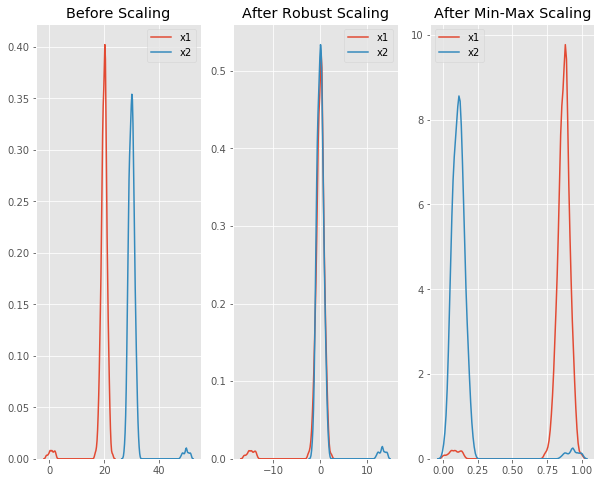

In [14]:
# Plot and visualize the results

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df4['x1'], ax=ax1)
sns.kdeplot(df4['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df4['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df4['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df4['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df4['x2'], ax=ax3)

plt.show()

**Interpretation**

We can see that, **RobustScaler** transform the distributions to brought them onto the same scale.The distributions actually overlap each other. The outliers remain outside the range of the new distributions. 

In **MinMaxScaler**, the two normal distributions are kept separate by the outliers that are inside the range of 0 and 1.

## 6. Normalizing data with Normalizer


In this feature scaling task, we rescale each observation to a length of 1 (a unit norm). Scikit-Learn provides, the **Normalizer** class for this task. In this task, we scale the components of a feature vector such that the complete vector 
has length one. 


This usually means dividing each component by the Euclidean length (magnitude) of the vector.


Mathematically, **normalization** can be expressed by the following equation: 


`x(i)norm =   x(i) / | x(i)|`


where  x(i) is a particular sample value , x(i)norm is its normalized value and | x(i)| is the corresponding Euclidean length of the vector. 


The syntax for normalization is quite similar to standardization given as follows:-


`from sklearn.preprocessing import Normalizer`

`nm = Normalizer()`

`X_train_nm = nm.fit_transform(X_train)`

`X_test_nm = nm.transform(X_test)`


In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
df5 = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [17]:

from sklearn.preprocessing import Normalizer
nm = Normalizer()
scaled_df5 = nm.fit_transform(df5)
scaled_df5 = pd.DataFrame(scaled_df5, columns= ['x1', 'y1', 'z1'])

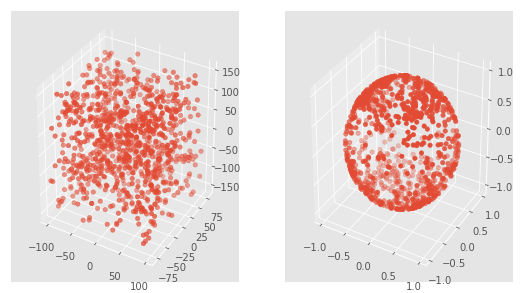

In [18]:
fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(df5['x1'], df5['y1'], df5['z1'])
ax2.scatter(scaled_df5['x1'], scaled_df5['y1'], scaled_df5['z1'])

plt.show()

## 7. Binarizing data with Binarizer


In this feature scaling procedure, we binarize the data (set feature values equal to 0 or 1) according to a threshold. 
So, using a binary threshold, we transform our data by marking the values above it to 1 and those equal to or below it to 0. 


Scikit-Learn provides **Binarizer** class for this purpose. The syntax for binarizing the data follow the same rules as above and is given below:-


`from sklearn.preprocessing import Binarizer`

`binr = Binarizer()`

`X_train_binr = binr.fit_transform(X_train)`

`X_test_binr = binr.transform(X_test)`


In [19]:
# Create sample dataset to demonstrate binarization 

data1 = [[2, -2, 1],
        [5, -5, 3],
        [1, 0, -1]]

df6 = pd.DataFrame(data1, columns = ['x1', 'x2', 'x3'])

In [20]:
# Use Binarizer to apply binarization

from sklearn.preprocessing import Binarizer
binr = Binarizer(threshold=0.0, copy=False)
scaled_df6 = binr.fit_transform(df6)
scaled_df6 = pd.DataFrame(scaled_df6, columns = ['x1', 'x2', 'x3'])

In [21]:
# Print the results

scaled_df6

,x1,x2,x3
0,1,0,1
1,1,0,1
2,1,0,0


**Interpretation**

We can see that the dataframe df6 values are converted into binary values of 0 or 1 according to the threshold of 0.

## 8. Mean removal with scale


In this feature scaling task, we remove the mean from each feature to centre it on zero. Thus, we standardize a dataset 
along any axis. Scikit-Learn provides **scale** class for this purpose. 


The syntax for this purpose is given below:-


`from sklearn.preprocessing import scale`

`scl = scale()`

`X_train_scl = scl.fit_transform(X_train)`

`X_test_scl = scl.transform(X_test)`


In [22]:
# Create sample dataset to demonstrate standardization using scale

data2 = [[5, -5, 1],
        [2, -2, 3],
        [1, 0, -1]]

df7 = pd.DataFrame(data2, columns = ['x4', 'x5', 'x6'])

In [23]:
# Use scale to apply standardization

from sklearn.preprocessing import scale
scaled_df7 = scale(df7)

In [24]:
# Print the results

scaled_df7

array([[ 1.37281295, -1.29777137,  0.        ],
       [-0.39223227,  0.16222142,  1.22474487],
       [-0.98058068,  1.13554995, -1.22474487]])

**Interpretation**

The dataset is now standardized along axis = 0. So, the feature variables are now standardized independently.

In [25]:
# The scaled data has zero mean

(scaled_df7.mean(axis = 0).astype(int))

array([0, 0, 0])

In [26]:
# The scaled data has unit variance

(scaled_df7.std(axis = 0))

array([1., 1., 1.])

**Interpretation**

We can see that the scaled data has zero mean and unit variance. 